In [1]:
import Pkg; Pkg.activate("./")

  Activating project at `~/Documents/Research/MonitoringMetrology/BackAction.jl/notebooks`


In [3]:
using BackAction
using Test
using LinearAlgebra
using QuadGK
using ProgressMeter
using Statistics
using Random
using Distributions
using HypothesisTests

Precompiling packages...
   4020.8 ms  ✓ BackAction
  1 dependency successfully precompiled in 6 seconds. 19 already precompiled.


In [ ]:
include("../test/test_drive_qubit.jl")

Sampling... 100%|██████████████████████████| Time: 0:02:14 (53.81 ms/it)


 52.412757 seconds (346.92 M allocations: 8.746 GiB, 3.00% gc time)
Pass  Total  Time
Driven Qubit: Expectation Value Convergence | 3000   3000  0.0s


In [24]:
using Plots

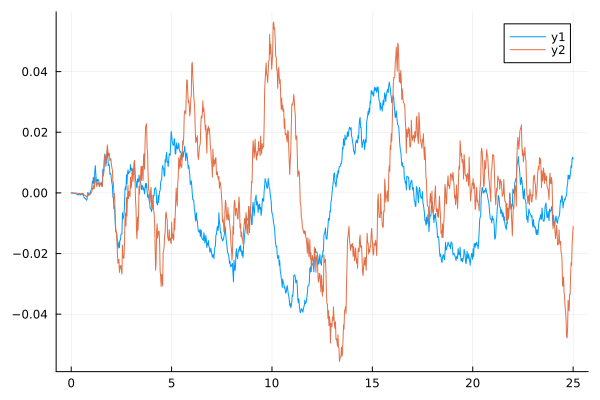

In [33]:
plot(t_given, r_analytical[2, :] - r_avg[:, 2])
plot!(t_given, r_analytical[3, :] - r_avg[:, 3])